
Performance Metrics:
--------------------------------------------------
Mean Absolute Error (MAE): 38.03
Direction Accuracy: 62.50%


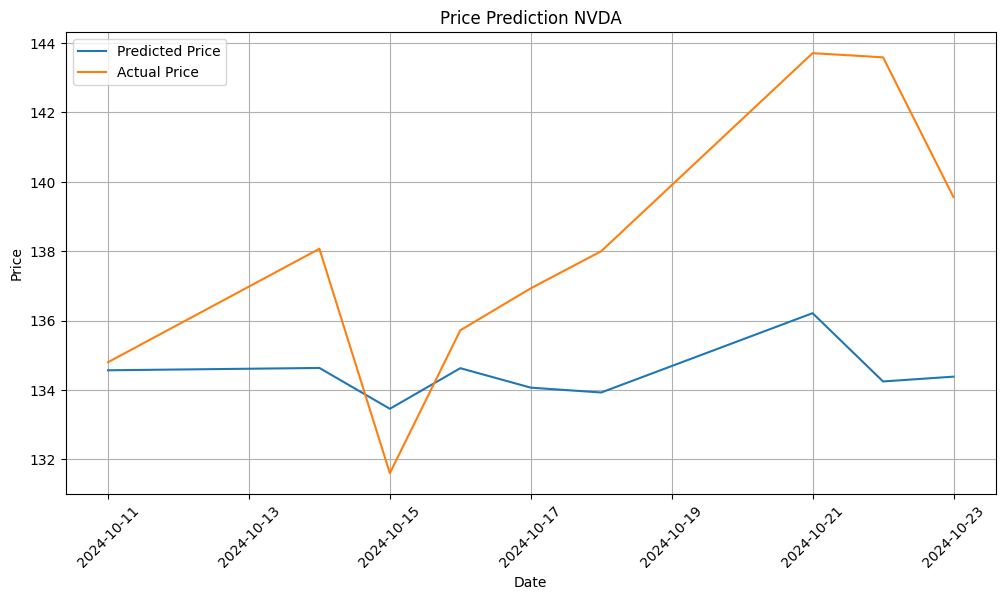

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

sequence_length = 7

# Load the saved model for predictions
model = tf.keras.models.load_model('trained_lstm_model.h5')

unseen_news_data = pd.read_csv('./NVDA_test.csv')
unseen_sentiment = unseen_news_data['sentiment'].values
news_count = unseen_news_data['news_count'].values

scaler = MinMaxScaler()  # Placeholder for scaler, assume fitted on training data


test_sequence = np.zeros(sequence_length)

X_unseen = [np.append(test_sequence, [unseen_sentiment[i], news_count[i]]) for i in range(len(unseen_sentiment))]
X_unseen = np.array(X_unseen).astype(float).reshape(len(unseen_sentiment), sequence_length + 2, 1)

# Make predictions
unseen_predictions = model.predict(X_unseen)
unseen_predictions = scaler.inverse_transform(unseen_predictions)  # Reverse scaling

# Extract dates and actual prices from the unseen data
predicted_dates = pd.to_datetime(unseen_news_data['Date'])
actual_prices = unseen_news_data['Adj Close'].values

# Create a DataFrame for plotting and analysis
comparison_df = pd.DataFrame({
    'Date': predicted_dates,
    'Predicted_Price': unseen_predictions.flatten(),
    'Actual_Price': actual_prices
})

# Calculate performance metrics
def calculate_metrics(actual, predicted):
    mae = np.mean(np.abs(actual - predicted))
    
    # Direction accuracy
    actual_direction = np.sign(np.diff(actual))
    predicted_direction = np.sign(np.diff(predicted))
    direction_accuracy = np.mean(actual_direction == predicted_direction) * 100
    
    return {
        'MAE': mae,
        'Direction_Accuracy': direction_accuracy
    }

# Calculate and display metrics
metrics = calculate_metrics(comparison_df['Actual_Price'], comparison_df['Predicted_Price'])
print("\nPerformance Metrics:")
print("-" * 50)
print(f"Mean Absolute Error (MAE): {metrics['MAE']:.2f}")
print(f"Direction Accuracy: {metrics['Direction_Accuracy']:.2f}%")

# Create visualization
plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
plt.plot(comparison_df['Date'], comparison_df['Predicted_Price'], label='Predicted Price')
plt.plot(comparison_df['Date'], comparison_df['Actual_Price'], label='Actual Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Prediction NVDA')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()
